In [12]:
import pandas as pd
from collections import Counter
from pathlib import Path
import os
import re
Image_Grid = Path('../../data/processed/dominant_color_imagegrid')
# Read the two CSV files
top3_common_color_classes_by_category = {}
for file_name in os.listdir(Image_Grid):
    file_path = Image_Grid / file_name
    if file_path.is_file():
        df_predictions = pd.read_csv(file_path)  # Contains image names, predicted classes, and probabilities
        match = re.search(r"(\d+)_to_(\d+)", file_name)
        if match:
            result = f"{match.group(1)}-{match.group(2)}"
            score_category = match.group(1)
        color_features = ['R1', 'G1', 'B1', 'R2', 'G2', 'B2', 'R3', 'G3', 'B3', 'R4', 'G4', 'B4', 'R5', 'G5', 'B5', 'R6', 'G6', 'B6', 'R7', 'G7', 'B7', 'R8', 'G8', 'B8']
        mean_colors_by_category = df_predictions[color_features].mean()
        # Output the total number of images and the most common prediction combination in each score category
        # print(f"File name: {file_name}, Most Common color: {mean_colors_by_category}")
        top3_common_color_classes_by_category[score_category] = mean_colors_by_category
data = []
for category, mean_colors_by_category in top3_common_color_classes_by_category.items():
    data.append([category] + list(mean_colors_by_category))

df = pd.DataFrame(data, columns=['Score Class', 'R1', 'G1', 'B1', 'R2', 'G2', 'B2', 'R3', 'G3', 'B3', 'R4', 'G4', 'B4', 'R5', 'G5', 'B5', 'R6', 'G6', 'B6', 'R7', 'G7', 'B7', 'R8', 'G8', 'B8'])

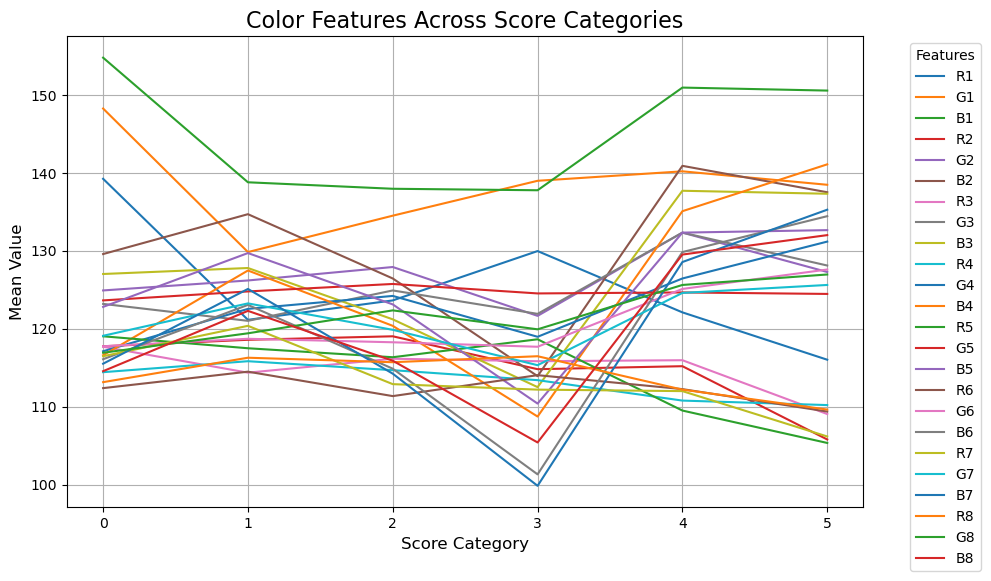

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for feature in color_features:
    plt.plot(df.index, df[feature], label=feature)

plt.title('Color Features Across Score Categories', fontsize=16)
plt.xlabel('Score Category', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Correlation between color features and score:
color_std      0.633737
Score Class    1.000000
Name: Score Class, dtype: float64


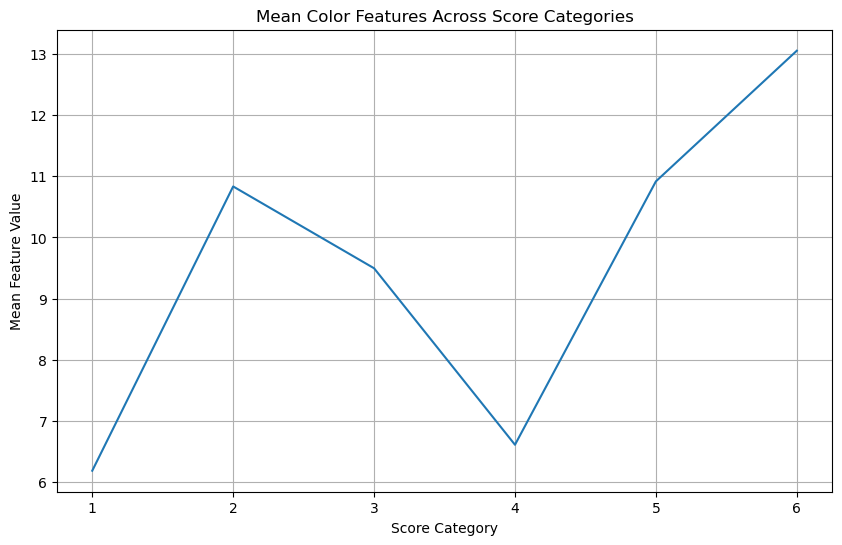

In [16]:
df['color_std'] = df[['R1', 'G1', 'B1', 'R2', 'G2', 'B2', 'R3', 'G3', 'B3', 'R4', 'G4', 'B4', 'R5', 'G5', 'B5', 'R6', 'G6', 'B6', 'R7', 'G7', 'B7', 'R8', 'G8', 'B8']].std(axis=1)

color_features_2 = ['color_std', 'Score Class']

correlation_matrix = df[color_features_2].corr()
print("Correlation between color features and score:")
print(correlation_matrix['Score Class'])

mean_colors_by_category_2 = df.groupby('Score Class')['color_std'].mean()

mean_colors_by_category_2.plot(kind='line', figsize=(10, 6))
plt.title('Mean Color Features Across Score Categories')
plt.xlabel('Score Category')
plt.ylabel('Mean Feature Value')
plt.grid(True)
# plt.savefig(f"/home/ubuntu/landscape-aesthetics/reports/figures/Mean Color Features Across Score Categories.jpg")
plt.show()